In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the RFM segmentation output file
file_path = '/content/RFM Segmentation output.csv'
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                customername  monetary_value  avg_monetary_value  frequency  \
0          La Rochelle Gifts       180124.90             3398.58          4   
1      Euro Shopping Channel       912294.11             3522.37         26   
2      Diecast Classics Inc.       122138.14             3939.94          4   
3                 Petit Auto        74972.52             2998.90          3   
4  Souveniers And Things Co.       151570.98             3295.02          4   

  last_order_date  final_date  recency  rfm_recency  rfm_frequency  \
0      2005-05-31  2005-05-31        1            4              4   
1      2005-05-31  2005-05-31        1            4              4   
2      2005-05-30  2005-05-31        2            4              4   
3      2005-05-30  2005-05-31        2            4              2   
4      2005-05-29  2005-05-31        3            4              4   

   rfm_monetary  RFM_SCORE Customer_Segment  
0             4        444  Loyal Custome

In [4]:
# Check for null values in the dataset
print("\nNull Values Summary:")
print(df.isnull().sum())


Null Values Summary:
customername          0
monetary_value        0
avg_monetary_value    0
frequency             0
last_order_date       0
final_date            0
recency               0
rfm_recency           0
rfm_frequency         0
rfm_monetary          0
RFM_SCORE             0
Customer_Segment      0
dtype: int64


## Visualization: Customer Segments Distribution

<ipython-input-5-c58f711a6287>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Customer_Segment', palette='viridis', order=df['Customer_Segment'].value_counts().index)


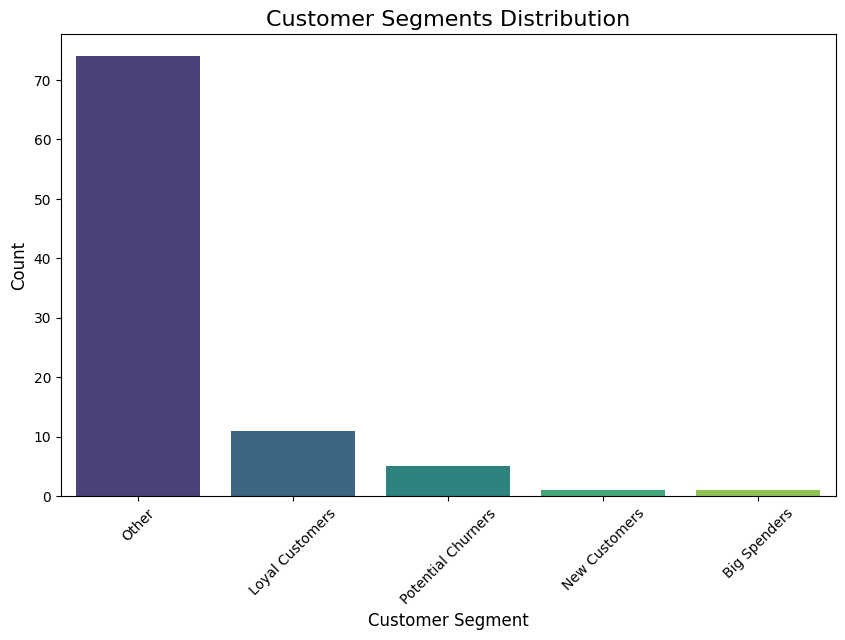

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Segment', palette='viridis', order=df['Customer_Segment'].value_counts().index)
plt.title('Customer Segments Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Visualization: Monetary Value per Customer Segment

<ipython-input-6-681d8e0024de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Segment', y='monetary_value', palette='viridis', order=df['Customer_Segment'].value_counts().index)


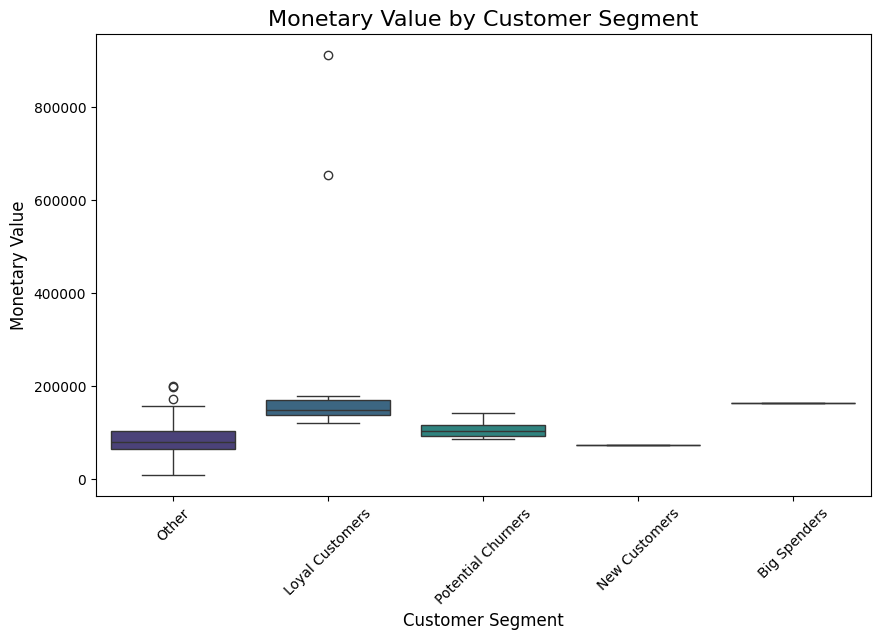

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer_Segment', y='monetary_value', palette='viridis', order=df['Customer_Segment'].value_counts().index)
plt.title('Monetary Value by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Monetary Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Visualization: Frequency per Customer Segment

<ipython-input-7-fb6c3dee8f12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Segment', y='frequency', palette='viridis', order=df['Customer_Segment'].value_counts().index)


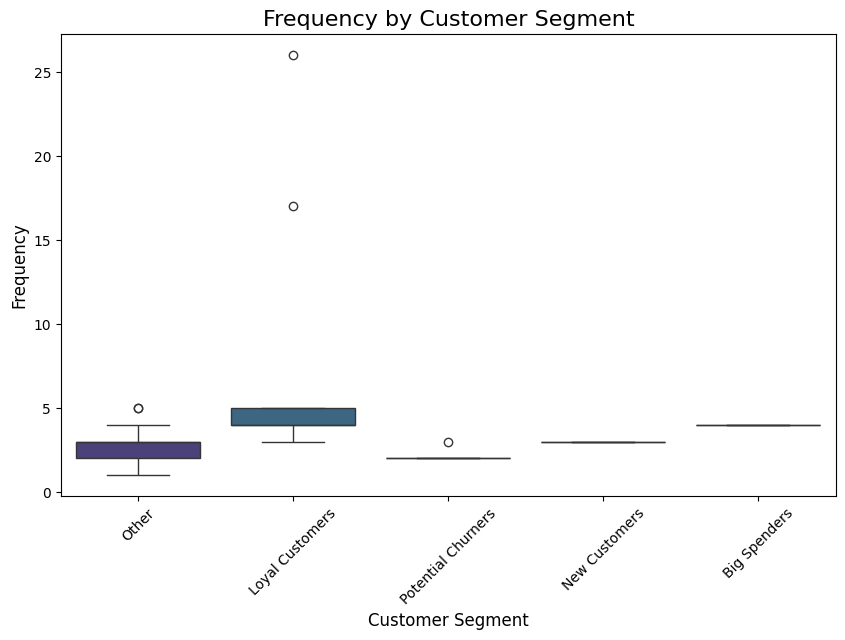

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer_Segment', y='frequency', palette='viridis', order=df['Customer_Segment'].value_counts().index)
plt.title('Frequency by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Visualization: Recency per Customer Segment

<ipython-input-8-e3765f6f040a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Customer_Segment', y='recency', palette='viridis', order=df['Customer_Segment'].value_counts().index)


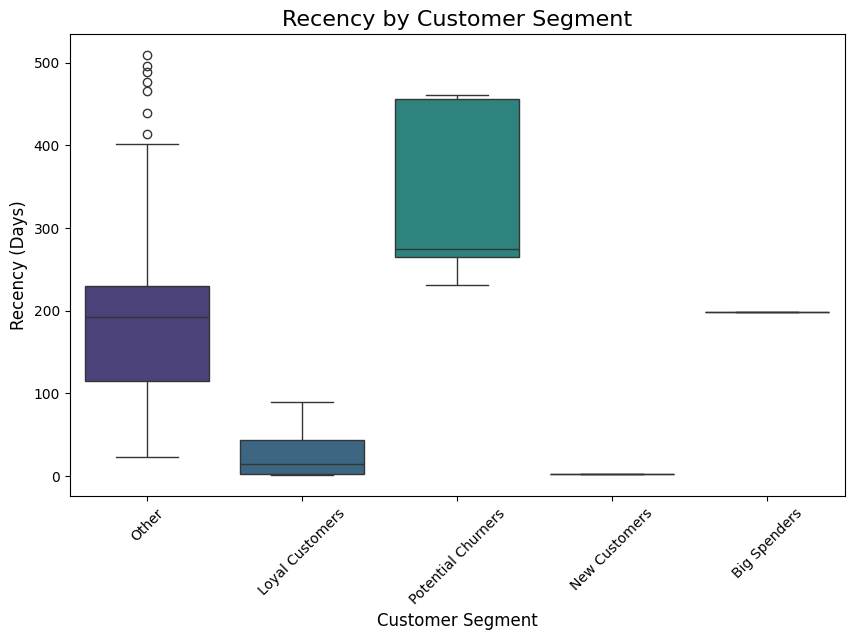

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer_Segment', y='recency', palette='viridis', order=df['Customer_Segment'].value_counts().index)
plt.title('Recency by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Recency (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Summary Statistics for each segment

In [9]:
print("\nSummary Statistics by Customer Segment:")
summary_stats = df.groupby('Customer_Segment').agg({
    'monetary_value': ['mean', 'median', 'sum'],
    'frequency': ['mean', 'median', 'sum'],
    'recency': ['mean', 'median', 'min']
}).reset_index()
print(summary_stats)


Summary Statistics by Customer Segment:
     Customer_Segment monetary_value                         frequency         \
                                mean      median         sum      mean median   
0        Big Spenders  164069.440000  164069.440   164069.44  4.000000    4.0   
1     Loyal Customers  262521.844545  149798.630  2887740.29  7.181818    4.0   
2       New Customers   74972.520000   74972.520    74972.52  3.000000    3.0   
3               Other   85953.674595   79955.275  6360571.92  2.837838    3.0   
4  Potential Churners  109054.936000  103080.380   545274.68  2.200000    2.0   

           recency              
   sum        mean median  min  
0    4  198.000000  198.0  198  
1   79   26.090909   15.0    1  
2    3    2.000000    2.0    2  
3  210  197.905405  192.5   23  
4   11  337.600000  275.0  231  


## Heatmap of RFM Scores

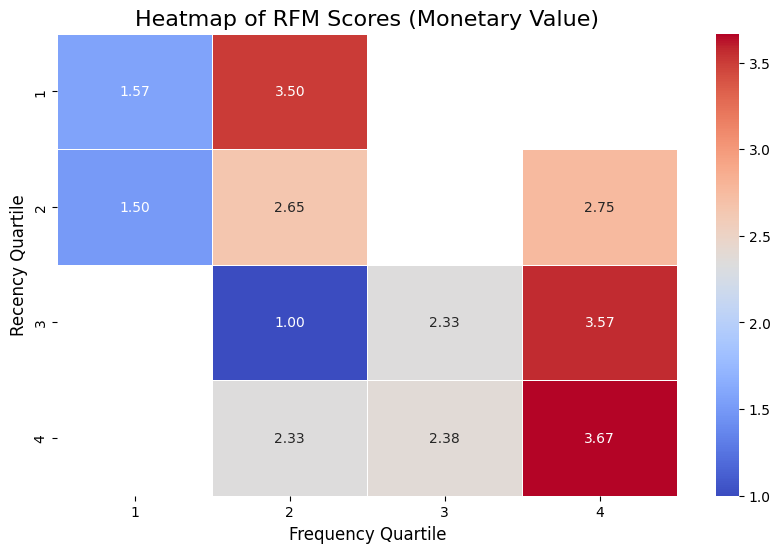

In [10]:
# Create a pivot table for heatmap visualization
heatmap_data = df.pivot_table(
    index='rfm_recency',
    columns='rfm_frequency',
    values='rfm_monetary',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of RFM Scores (Monetary Value)', fontsize=16)
plt.xlabel('Frequency Quartile', fontsize=12)
plt.ylabel('Recency Quartile', fontsize=12)
plt.show()

## Heatmap of Recency, Frequency, and Monetary Value by Customer Segment

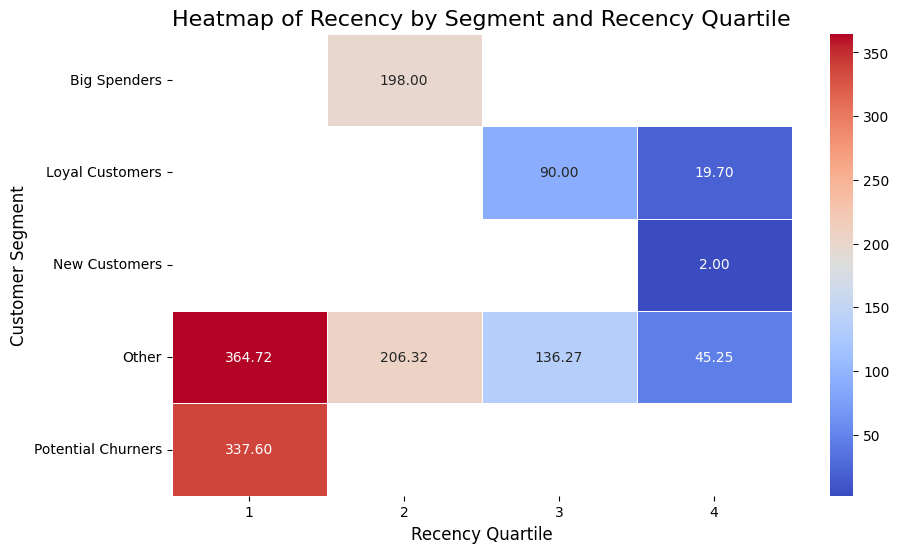

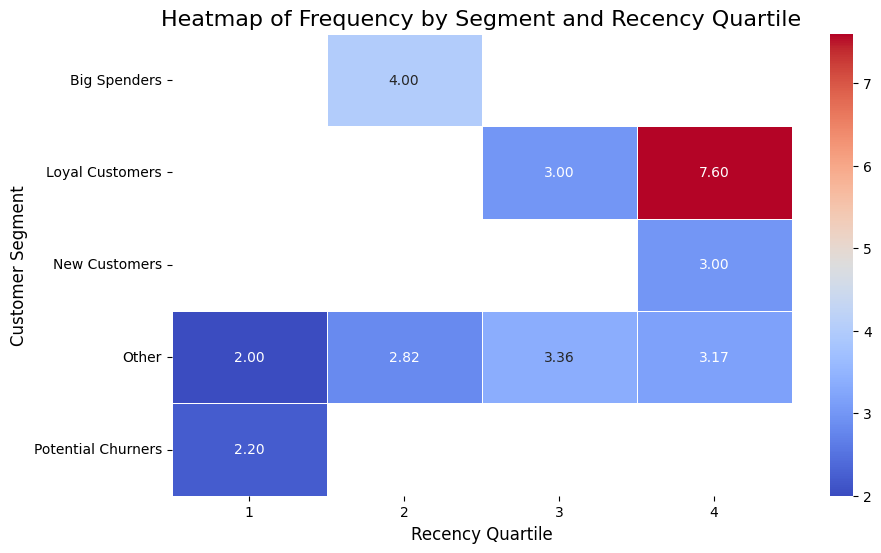

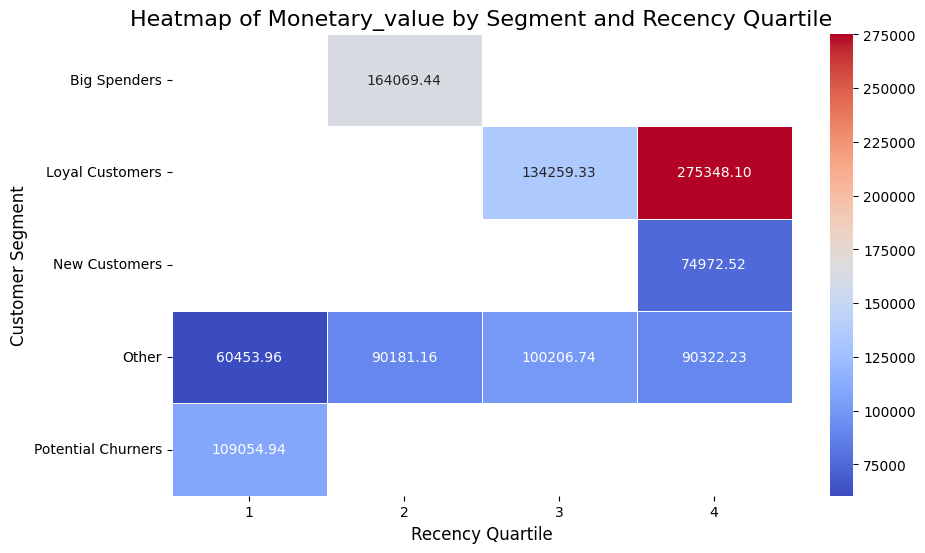

In [11]:
# Heatmap of Recency, Frequency, and Monetary Value by Customer Segment
metrics = ['recency', 'frequency', 'monetary_value']
for metric in metrics:
    heatmap_data = df.pivot_table(
        index='Customer_Segment',
        columns='rfm_recency',
        values=metric,
        aggfunc='mean'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title(f'Heatmap of {metric.capitalize()} by Segment and Recency Quartile', fontsize=16)
    plt.xlabel('Recency Quartile', fontsize=12)
    plt.ylabel('Customer Segment', fontsize=12)
    plt.show()


# Summary of the segment-wise heatmap

The heatmap shows important consumer segment behaviours according to their recency, frequency, and monetary value.
- **Big Spenders:** Customers who spends a lot.
- **Loyal Customers:** Customers who frequently purchase and spend a lot.
- **New Customers:** Customers who have recently made a first purchase though their monetary value is low.
- **Potential Churners:** Customers who haven't purchased recently



